# Bank Customer Churn Part 2 Exploratory Data Analysis
Now that we have cleaned and processed the data, we will move on to the **Exploratory Data Analysis (EDA)** phase, using the `EDA_ready.csv` file. In this part, we will explore the dataset to gain insights and understand the underlying patterns and relationships between variables.

## Part 2 We will cover below steps:

[**1. Load the Cleaned Data**](#load-the-cleaned-data)

[**2. Summary Statistics- Univariate Analysis**](#summary-statistics)
- [**2.1 Numerical Variables**](#numerical-variables)
    - [**2.1.1 Statistics Summary for Numerical Variables**](#statistics-summary-for-numerical-variables)
    - [**2.1.2 Insights from Statistics for Numerical Variables**](#insights-from-statistics-for-numerical-variables)
    - [**2.1.3 Distribution of Numerical Variables - Visual of Statistics Summary**](#distribution-of-numerical-variables)

- [**2.2 Categorical Variables**](#categorical-variables)
    - [**2.2.1 Statistics Summary for Categorical Variables**](#statistics-summary-for-categorical-variables)
    - [**2.2.2 Insights from Statistics for Categorical Variables**](#insights-from-statistics-for-categorical-variables)
    - [**2.2.3 Categorical Variable Analysis - Visual of Statistics Summary**](#categorical-variable-analysis)


[**3. Correlation Analysis**](#correlation-analysis)
- [**3.1 Correlation Matrix**](#correlation-matrix)
- [**3.2 Correlation Insight**](#correlation-insight)

[**4. Bivariate Analysis: Relationship Between X and Y**](#relationships-between-variables)
- [**4.1 Numerical X to Y Relationships**](#numeric-xy)
    - [**4.1.1 Statistical Analysis Each Numerical Variable in Relationship with Y**](#411-calculate-each-numerical-variable-in-relationship-with-y)
    - [**4.1.2 Visualize Each Numerical Variable in Relationship with Y**](#412-visualize-each-numerical-variable-in-relationship-with-y)
    - [**4.1.3 Insights from Numerical X to Y Relationships**](#413-insights-from-numerical-x-to-y-relationships)
- [**4.2 Categorical X to Y Relationships**](#categorical-xy)
    - [**4.2.1 Chi-Square Test for Each Categorical Variable**](#421-chi-square-test-for-each-categorical-variable)
    - [**4.2.2 Chi-Square Test Results and Interpretation**](#422-chi-square-test-results-and-interpretation)
    - [**4.2.3 Summary of Chi-square Key Insights**](#423-summary-of-chi-square-key-insights)
    - [**4.2.4 Categorical X Churn Rate Calculation**](#424-categorical-x-churn-rate-calculation)
    - [**4.2.5 Categorical X Churn Rate Visualization**](#425-categorical-x-churn-rate-visualization)
    - [**4.2.6 Key Insights from Categorical Variable Churn Rate Analysis**](#426-key-insights-from-categorical-variable-churn-rate-analysis)


---
## Recall: Business Problem Formulation:
<a name="business-problem-formulation"></a>
Customer attrition is a critical problem for financial institutions, as it is more expensive to acquire new customers than to retain existing ones. By predicting which customers are likely to churn, the bank can implement **targeted retention strategies**, **proactive customer engagement**, **real-time churn alerts**, **improving customer retention** and **reducing revenue losses**.

To predict **customer attrition** (churn) based on various **categorical** and **numerical** attributes provided by a bank. **Attrition** represents customers who have stopped using the bank’s services. The goal is to identify key drivers of customer attrition and build a predictive model to proactively address churn risks.


## <a name="load-the-cleaned-data"></a>1. Load the Cleaned Data

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the cleaned data
df_eda = pd.read_csv('EDA_ready.csv')

# Show the first few rows of the data
df_eda.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45.0,M,3.0,High School,Married,$60K - $80K,Blue,39.0,...,1.0,3.0,12691.0,777.0,11914.0,1.201,1144.0,42.0,1.172,0.061
1,818770008,Existing Customer,49.0,F,5.0,Graduate,Single,Less than $40K,Blue,44.0,...,1.0,2.0,8256.0,864.0,7392.0,1.201,1291.0,33.0,1.172,0.105
2,713982108,Existing Customer,51.0,M,3.0,Graduate,Married,$80K - $120K,Blue,36.0,...,1.0,0.5,3418.0,0.0,3418.0,1.201,1887.0,20.0,1.172,0.000
3,769911858,Existing Customer,40.0,F,4.0,High School,Unknown,Less than $40K,Blue,34.0,...,4.0,1.0,3313.0,2517.0,796.0,1.201,1171.0,20.0,1.172,0.760
4,709106358,Existing Customer,40.0,M,3.0,Uneducated,Married,$60K - $80K,Blue,21.0,...,1.0,0.5,4716.0,0.0,4716.0,1.201,816.0,28.0,1.172,0.000


## <a name="summary-statistics"></a>2. Summary Statistics

In [6]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  float64
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  float64
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  float64
 10  Total_Relationship_Count  10127 non-null  float64
 11  Months_Inactive_12_mon    10127 non-null  float64
 12  Contacts_Count_12_mon     10127 non-null  float64
 13  Credit_Limit              10127 non-null  float64
 14  Total_

### <a name="numerical-variables"></a> 2.1 Numerical Variables

### <a name="statistics-summary-for-numerical-variables"></a> 2.1.1 Statistics Summary for Numerical Variables

In [9]:
df_eda.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325368,2.346203,35.945394,3.812580,2.315444,2.458329,7882.309381,1162.814061,6720.676247,0.751387,3948.349561,64.858003,0.703484,0.274894
std,3.690378e+07,8.015036,1.298908,7.773496,1.554408,0.930323,1.025784,7217.091225,814.987335,7223.542192,0.184542,2161.970455,23.470452,0.197203,0.275691
min,7.080821e+08,26.000000,0.000000,17.500000,1.000000,0.500000,0.500000,1438.300000,0.000000,3.000000,0.289000,510.000000,10.000000,0.228000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,68.500000,5.000000,53.500000,6.000000,4.500000,4.500000,23836.250000,2517.000000,22660.750000,1.201000,8619.250000,135.000000,1.172000,0.999000


### <a name="insights-from-statistics-for-numerical-variables"></a> 2.1.2 Insights from Statistics for Numerical Variables

On average, the customers are **46 years old** with a typical range of **26 to 68.5 years**. The average customer has about **2 dependents** and has been with the company for approximately **36 months** (about 3 years). Most customers hold around **3.8 products/services** with the company, and they tend to have around **2-3 months** of inactivity in the last year, while contacting the company roughly **2-3 times**.

Customers have an average **credit limit of 7,882 units**, with significant variability in dicated by **std**, as some have much lower limits and others significantly higher. The total revolving balance (credit carried over month-to-month) averages **1,162 units**, and the average open-to-buy credit is **6,720 units**, reflecting diverse financial behaviors across the customer base.

In terms of transactions, customers typically make **64 transactions** per year, with a total transaction amount averaging **3,948 units**. Transaction activity fluctuates seasonally, with changes in both transaction amounts and counts between quarters.



### <a name="distribution-of-numerical-variables"></a> 2.1.3 Distribution of Numerical Variables - Visual of Statistics Summary

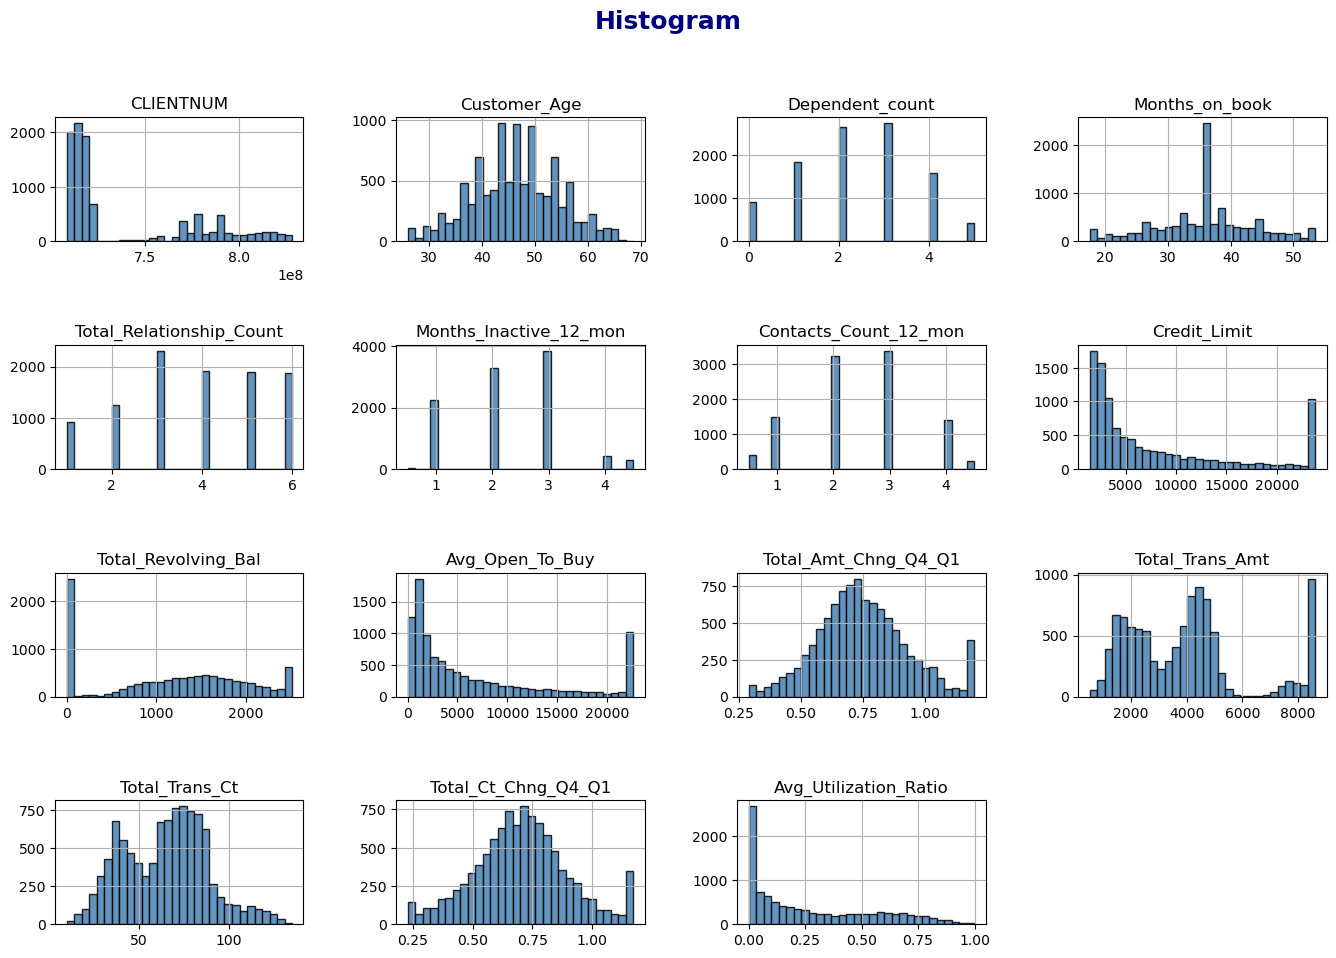

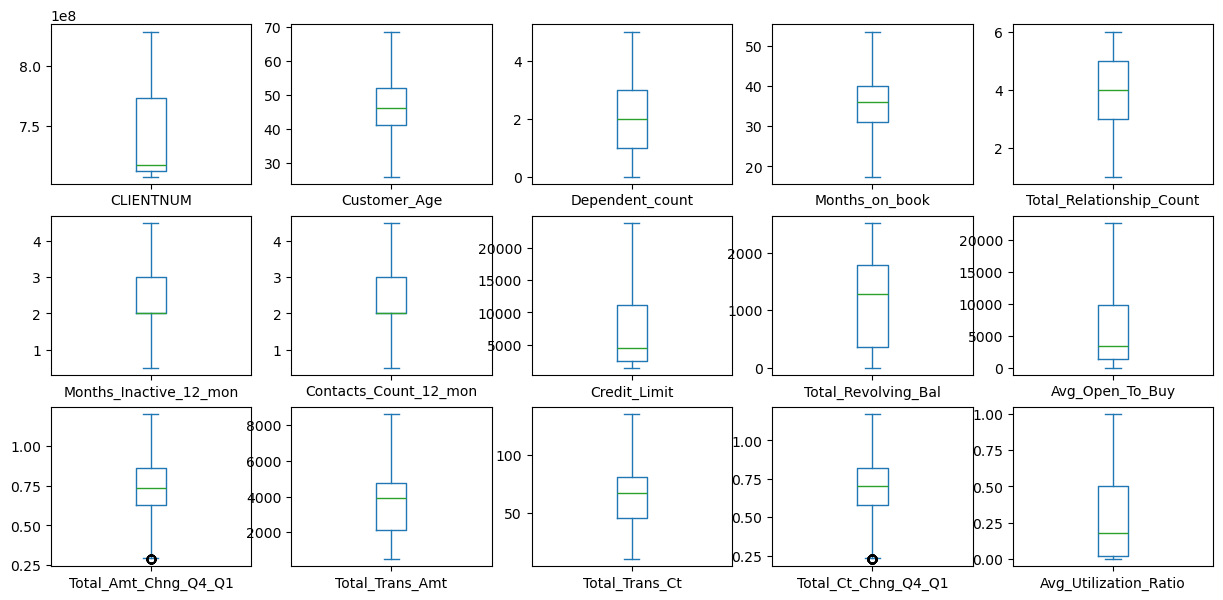

In [12]:
# Plot histograms for numerical variables
custom_palette = sns.color_palette("coolwarm")

# Plot histograms for numerical variables 
df_eda.hist(figsize=(14, 10), bins=30, edgecolor='black', color='steelblue', alpha=0.85)
plt.suptitle('Histogram', fontsize=18, weight='bold', color='navy')
plt.tight_layout(pad=3)
plt.show()

# Plot box plots for numerical variables
df_eda.plot(kind='box', subplots=True, layout=(5,5), figsize=(15, 12), sharex=False, sharey=False)
plt.show()

### <a name="categorical-variables"></a> 2.2 Categorical Variables

### <a name="statistics-summary-for-categorical-variables"></a> 2.2.1 Statistics Summary for Categorical Variables

In [15]:
df_eda.describe(include='object')

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


### <a name="insights-from-statistics-for-categorical-variables"></a> 2.2.2 Insights from Statistics for Categorical Variables

#### 1. **Attrition_Flag** (Churn Indicator)
- **Top Category**: The majority of customers are **Existing Customers**.
- **Insight**: **8,500 out of 10,127** customers are still with the company. The company has a relatively low churn rate (~16%), which is positive, but understanding the reasons behind the attrition and focusing on retention strategies for at-risk customers will be important.

#### 2. **Gender**
- **5,358** customers are female, which is about **53%** of the customer base.
- **Insight**: The gender distribution is fairly balanced, but there is a slight dominance of female customers. This balance allows for potentially gender-neutral marketing strategie.

#### 3. **Education_Level**
- **Top Category**: The most common education level is **Graduate**, representing **3,128** customers.
- **Insight**: A significant portion of the customer base is relatively well-educated. This suggests that financial products and marketing may need to be tailored to a more informed audience who may expect higher-value or more sophisticated financial services.

#### 4. **Marital_Status**
- **Insight**: **46%** of customers are married. This could indicate a more stable and financially secure customer base, suggesting family or household-related financial products.

#### 5. **Income_Category**
- **Insight**: A large portion of the customer base falls into the lower income bracket, with **35%** of customers earning less than $40K. 

#### 6. **Card_Category**
- **Top Category**: The overwhelming majority of customers (**9,436 out of 10,127**) have the **Blue** card.
- **Insight**: The **Blue** card dominates the customer base with more than **93%** of customers holding this card type. This likely represents the basic or entry-level card.

### Recommendations:
- **Retention Programs**: Focus on understanding and retaining the 16% of customers who have churned. Consider offering loyalty programs, targeted campaigns, or product upgrades to retain high-risk customers.
- **Upsell Opportunities**: Most customers hold the **basic Blue card**, which could represent an opportunity to offer them premium products (Silver, Gold, Platinum) or additional services.
- **Tailored Marketing**: Given that many customers are lower-income and well-educated, marketing strategies should focus on affordable financial solutions while also appealing to the educated demographic by offering sophisticated services or educational content.


### <a name="categorical-variable-analysis"></a> 2.2.3 Categorical Variable Analysis - Visual of Statistics Summary

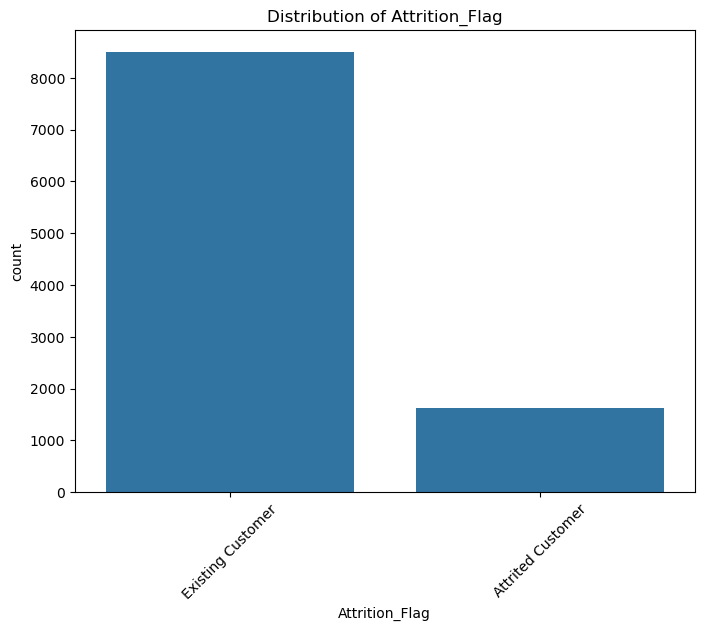

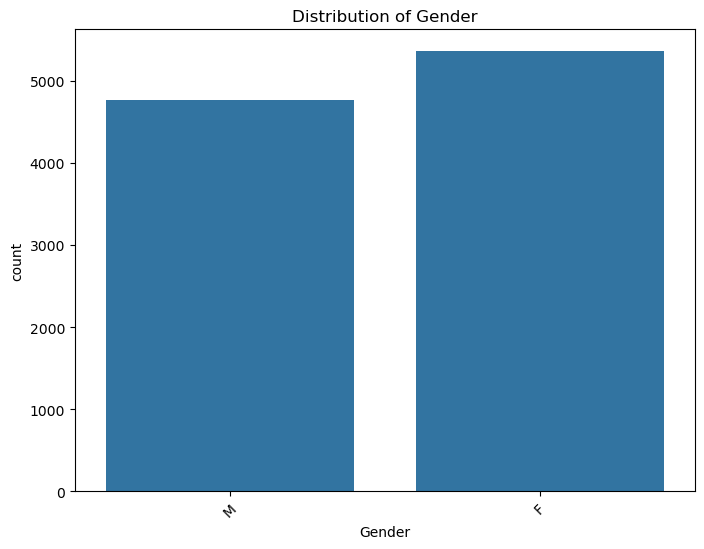

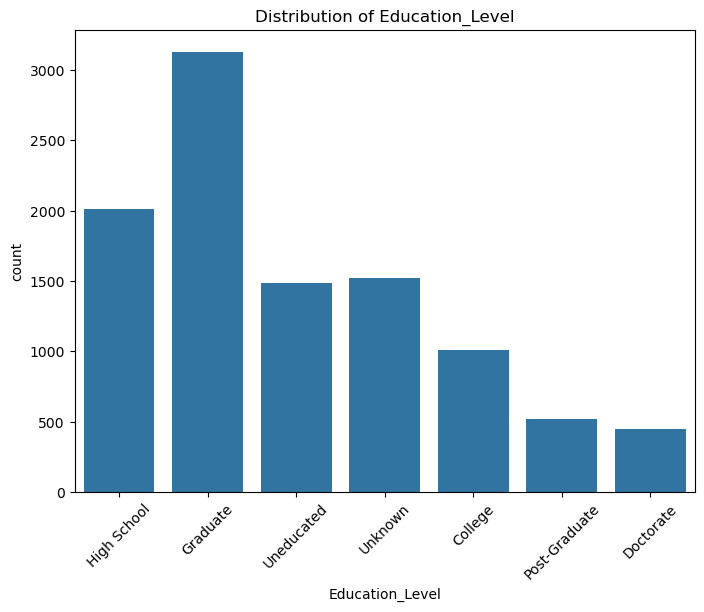

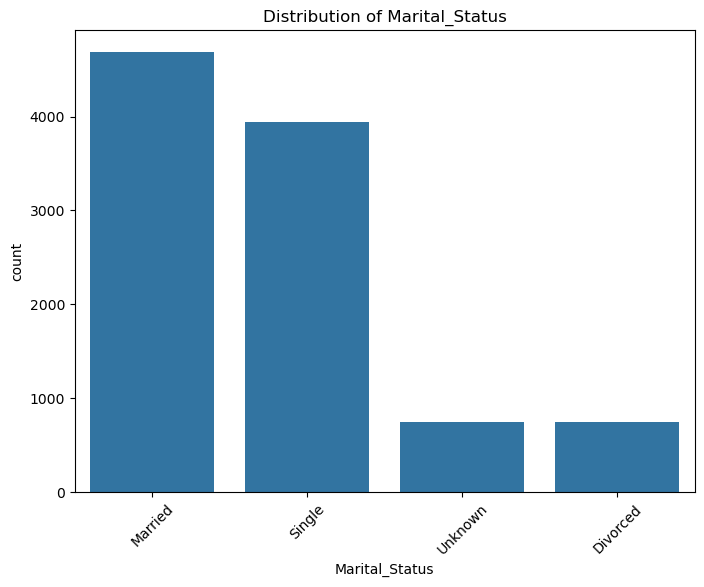

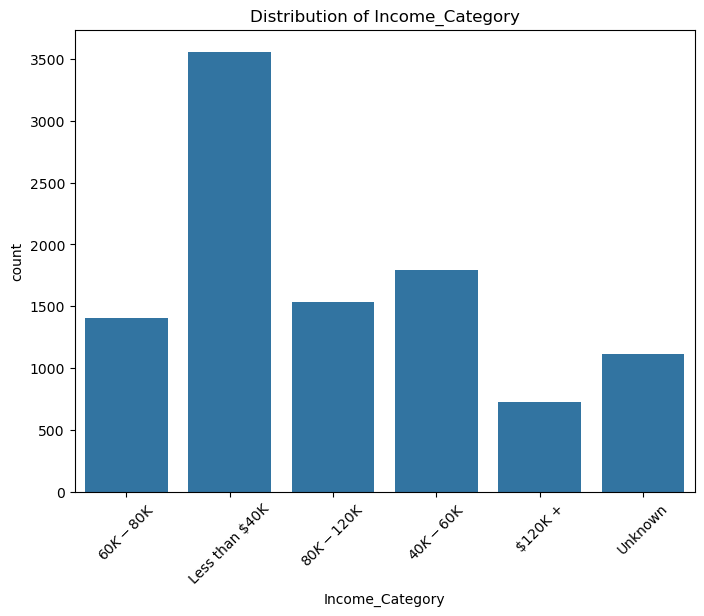

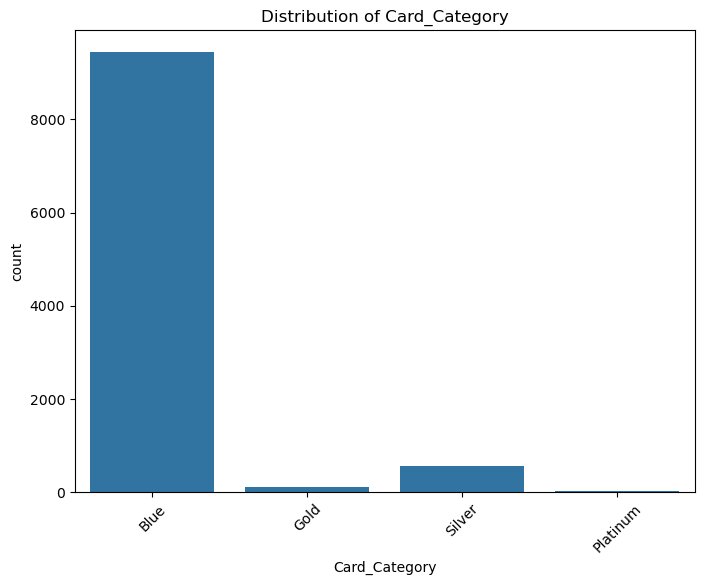

In [18]:
# Plot vertical count plots for categorical variables
categorical_columns = df_eda.select_dtypes(include=['category', 'object']).columns

for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df_eda)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary
    plt.show()

## <a name="correlation-analysis"></a>3. Correlation Analysis-Select only predictor numeric variables

### <a name="correlation-matrix"></a> 3 .1 Correlation Matrix

In [21]:
df_eda['Attrition_Flag'] = df_eda['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

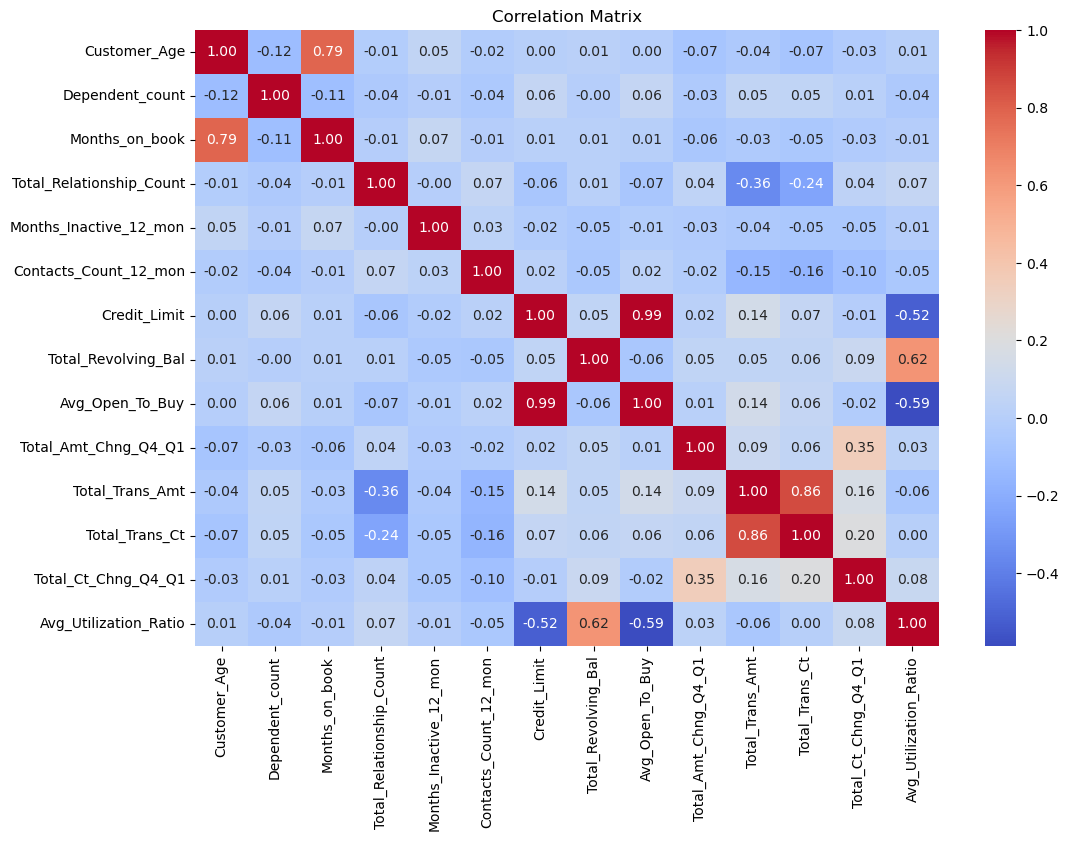

In [22]:

numeric_df = df_eda.select_dtypes(include=['float64'])

# Correlation matrix for numerical variables
corr_matrix = numeric_df.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### <a name="correlation-insight"></a> 3 .2 Correlation Insight

The correlation matrix you provided shows how each pair of numerical variables is related to one another. Correlation values range from -1 to 1, where:

- 1 indicates a perfect positive correlation (as one variable increases, the other increases).
- -1 indicates a perfect negative correlation (as one variable increases, the other decreases).
- 0 indicates no linear relationship between the two variables.

### Key Insights from the Correlation Matrix:

#### 1. **Strong Positive Correlations**:
   - **Credit_Limit and Avg_Open_To_Buy (0.994)**: This makes sense, as the open-to-buy credit (available credit) is directly related to the credit limit. A higher credit limit generally means more available credit, assuming the balance isn’t fully used.
   - **Total_Trans_Amt and Total_Trans_Ct (0.860)**: The total number of transactions and total transaction amount are highly correlated, meaning customers who make more transactions also tend to have higher transaction amounts.
   - **Total_Ct_Chng_Q4_Q1 and Total_Amt_Chng_Q4_Q1 (0.347)**: The change in transaction count and change in transaction amount between Q4 and Q1 are positively correlated, suggesting that an increase in the number of transactions is often associated with an increase in the transaction amount.
   - **Months_on_book and Customer_Age (0.788)**: Customers who have been with the bank longer tend to be older, which is expected, as customers grow older the longer they stay with the bank.

#### 2. **Negative Correlations**:
   - **Credit_Limit and Avg_Utilization_Ratio (-0.518)**: A higher credit limit is negatively correlated with the utilization ratio. This means that customers with higher credit limits tend to have lower utilization ratios, likely because they use a smaller proportion of their available credit.
   - **Total_Relationship_Count and Total_Trans_Amt (-0.357)**: Surprisingly, customers with more relationships (products/services) with the bank tend to have lower transaction amounts. This could suggest that customers with multiple relationships might not necessarily engage in frequent transactions or high-value transactions.
   - **Total_Relationship_Count and Total_Trans_Ct (-0.241)**: Similar to the relationship with transaction amounts, the number of total transactions also decreases as the number of relationships increases, indicating that customers with multiple relationships might be more passive in their transaction activity.


#### Examining Collinearity - Only for predictor variables

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only numerical columns for VIF
X = df_eda.select_dtypes(include=['float64'])

# Create a DataFrame to hold VIF values
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF values
vif_data

,Variable,VIF
0,Customer_Age,76.890255
1,Dependent_count,4.053150
2,Months_on_book,59.283540
3,Total_Relationship_Count,7.770886
4,Months_Inactive_12_mon,6.832643
5,Contacts_Count_12_mon,6.308345
6,Credit_Limit,2243.883240
7,Total_Revolving_Bal,32.909362
8,Avg_Open_To_Buy,1949.936341
9,Total_Amt_Chng_Q4_Q1,17.960833


<a name="relationships-between-variables"></a>
## 4. Bivariate Analysis: Relationship Between X and Y

### Below shows cross relationships among predictor variables and reponse variable

In [29]:
# Select numerical columns
#numerical_columns = df_eda.select_dtypes(include=['float64']).columns

#Pair plot for all numerical variables with hue set to Attrition_Flag
#sns.pairplot(df_eda, vars=numerical_columns, hue='Attrition_Flag', diag_kind='kde', height=2.5)
#plt.suptitle('Pair Plot of All Numerical Variables by Attrition Flag', y=1.02)
#plt.show()

<a name="numeric-xy"></a>
## 4.1 Numerical X to Y Relationships

<a name="411-calculate-each-numerical-variable-in-relationship-with-y"></a>
### 4.1.1 Statistical Analysis of Each Numerical Variable in Relationship with Y

In [32]:
# Select all numerical columns (excluding CLIENTNUM and Attrition_Flag)
numerical_columns = df_eda.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns.drop(['CLIENTNUM', 'Attrition_Flag'])  # Exclude CLIENTNUM and Attrition_Flag


# Set display options to show more columns and rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows

# Group by Attrition_Flag and calculate summary statistics for all numerical variables
summary_stats = df_eda.groupby('Attrition_Flag')[numerical_columns].agg(['mean', 'median', 'min', 'max', 'std'])

# Transpose the summary statistics to flip rows and columns
summary_stats_flipped = summary_stats.T

# Display the transposed summary statistics
print(summary_stats_flipped)

Attrition_Flag                              0             1
Customer_Age             mean       46.261412     46.659496
                         median     46.000000     47.000000
                         min        26.000000     26.000000
                         max        68.500000     68.000000
                         std         8.079050      7.665652
Dependent_count          mean        2.335412      2.402581
                         median      2.000000      2.000000
                         min         0.000000      0.000000
                         max         5.000000      5.000000
                         std         1.303229      1.275010
Months_on_book           mean       35.899353     36.185925
                         median     36.000000     36.000000
                         min        17.500000     17.500000
                         max        53.500000     53.500000
                         std         7.802764      7.616601
Total_Relationship_Count mean        3.9

<a name="412-visualize-each-numerical-variable-in-relationship-with-y"></a>
### 4.1.2 Visualize Each Numerical Variable in Relationship with Y

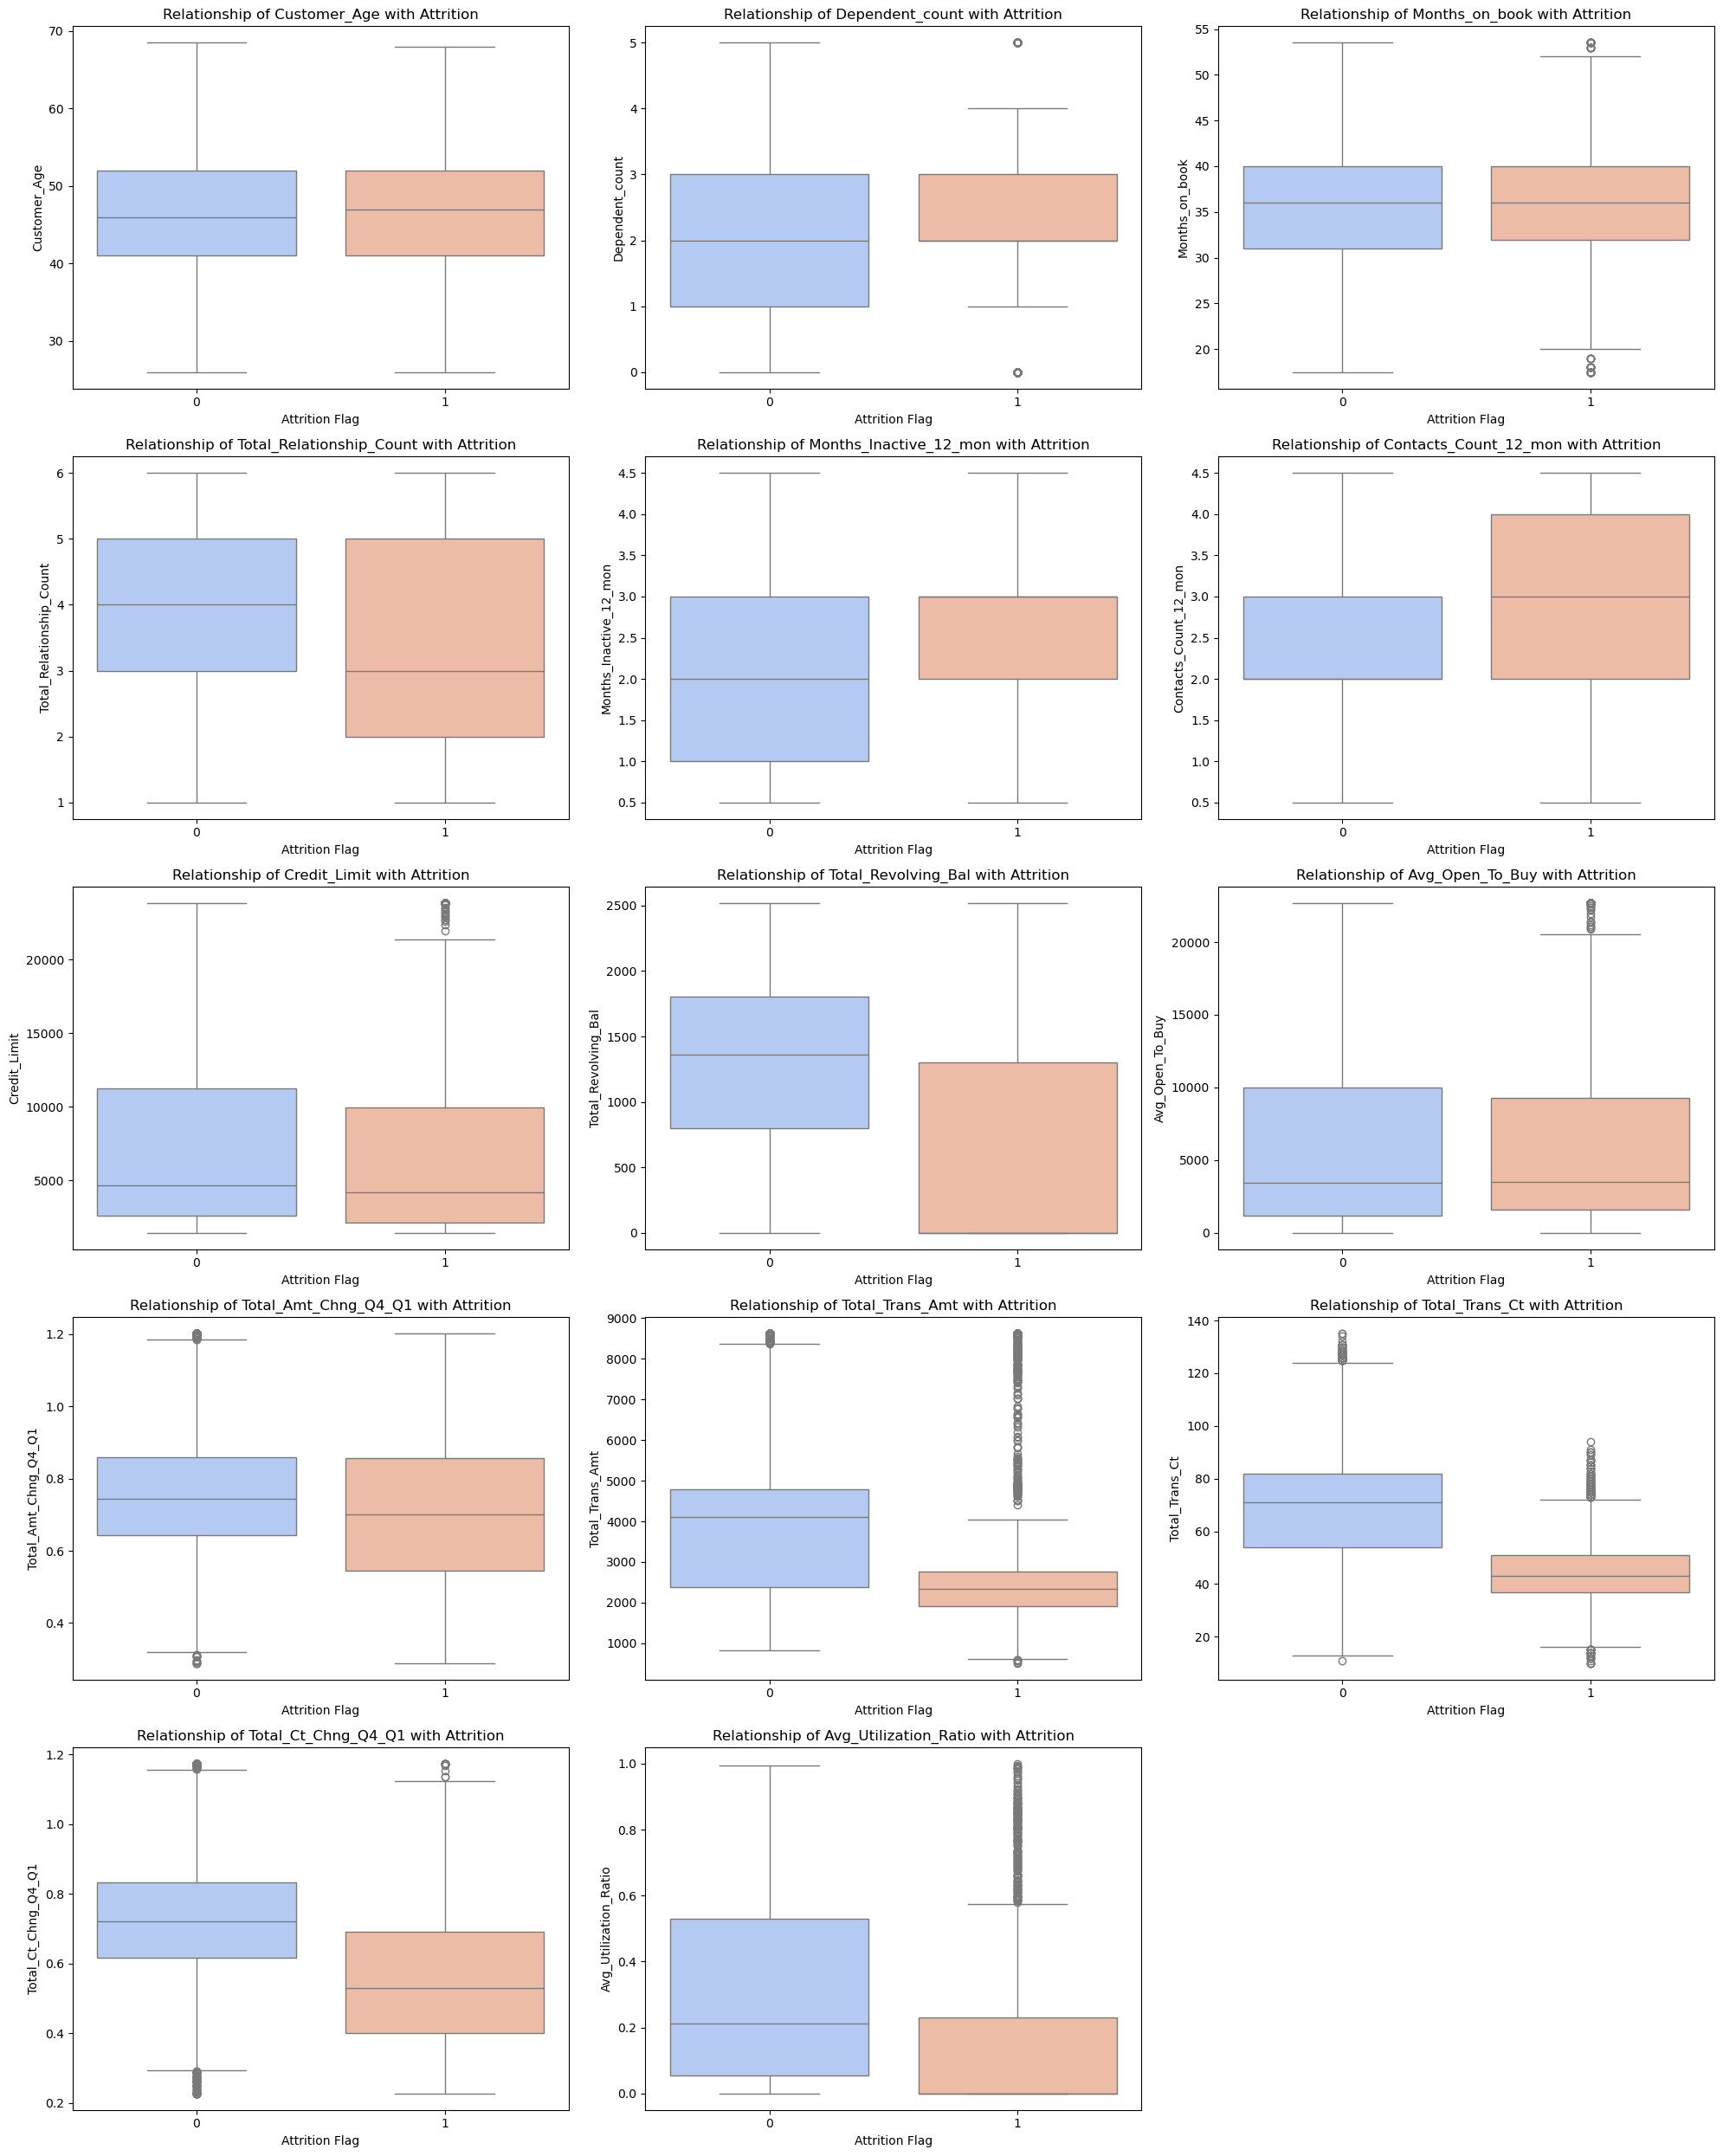

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Number of rows and columns for the grid
n_cols = 3  # Adjust this based on how many plots you want per row
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Calculate the required rows

# Create the subplots grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))

# Flatten axes to iterate easily
axes = axes.flatten()

# Loop through each numerical column and plot in corresponding axes
for i, column in enumerate(numerical_columns):
    sns.boxplot(x='Attrition_Flag', y=column, data=df_eda, palette='coolwarm', ax=axes[i])
    axes[i].set_title(f'Relationship of {column} with Attrition')
    axes[i].set_ylabel(f'{column}')
    axes[i].set_xlabel('Attrition Flag')

# Remove any unused subplots if columns < rows * cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

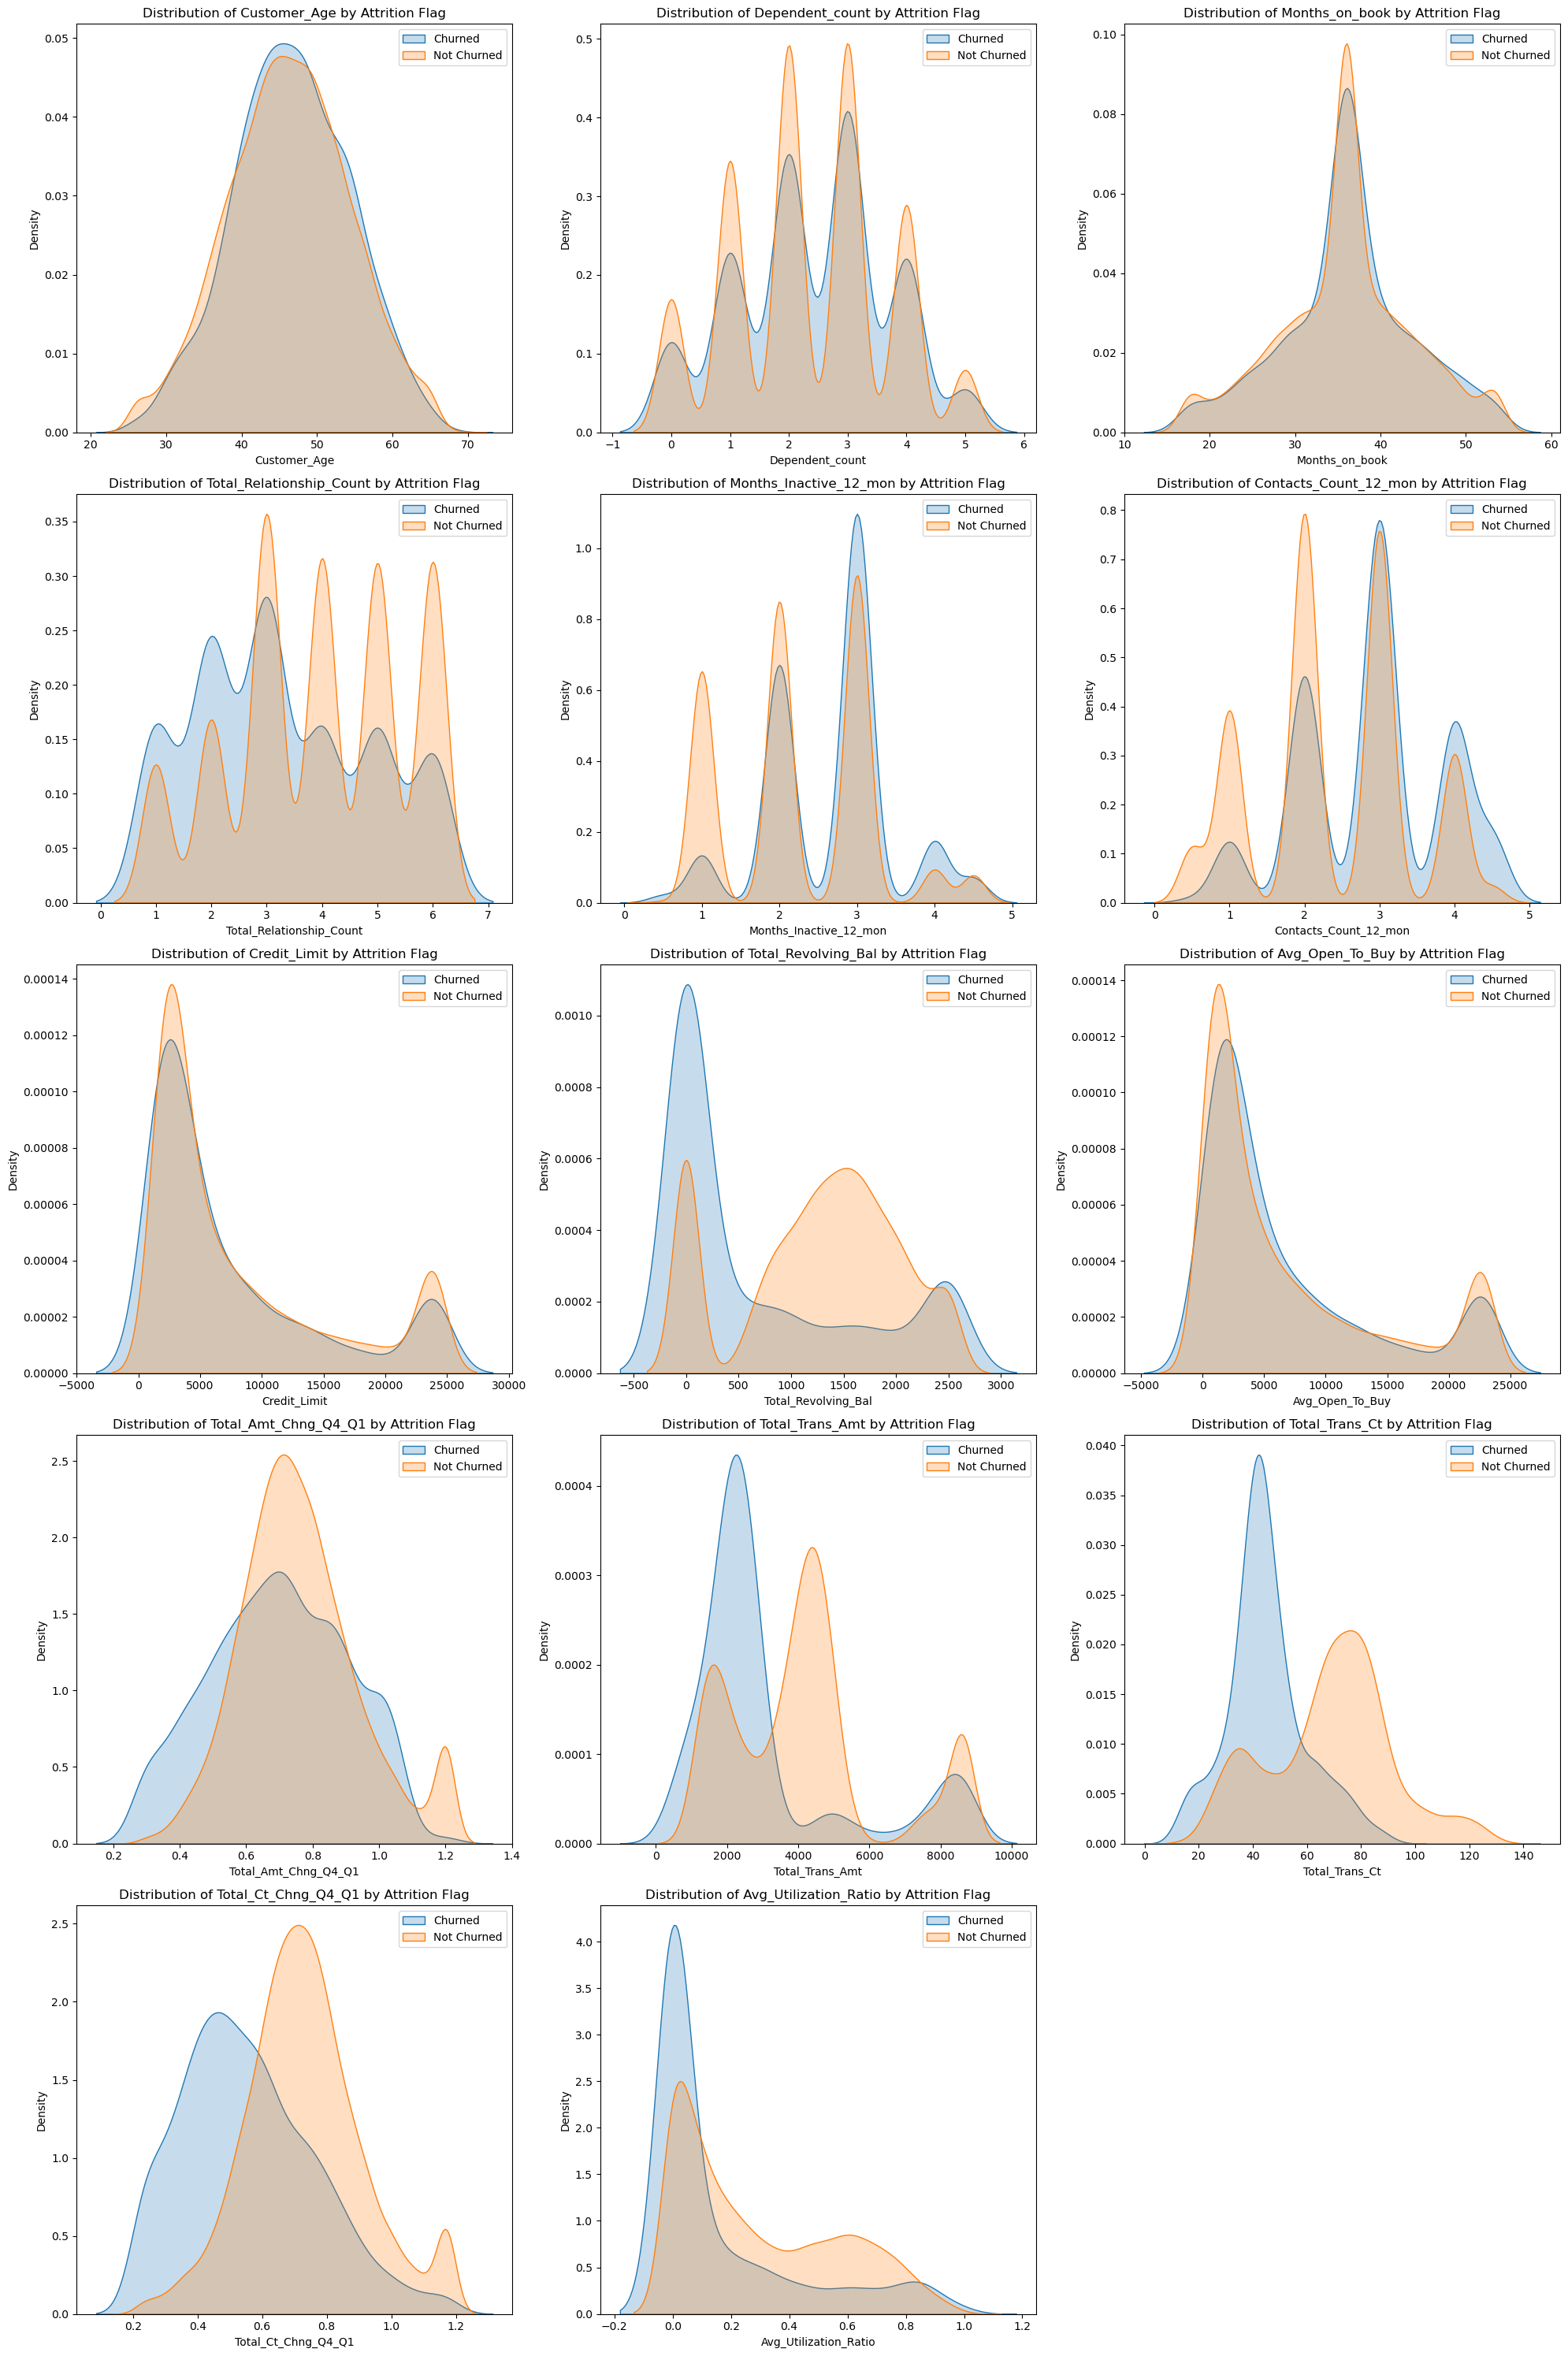

In [35]:
# Number of rows and columns for the grid
n_cols = 3  # Adjust this based on how many plots you want per row
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Calculate the required rows

# Create the subplots grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 6))

# Flatten axes to iterate easily
axes = axes.flatten()

# Loop through each numerical column and plot in corresponding axes
for i, column in enumerate(numerical_columns):
    sns.kdeplot(df_eda[column][df_eda['Attrition_Flag'] == 1], label='Churned', shade=True, ax=axes[i])
    sns.kdeplot(df_eda[column][df_eda['Attrition_Flag'] == 0], label='Not Churned', shade=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column} by Attrition Flag')
    axes[i].legend()

# Remove any unused subplots if columns < rows * cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<a name="413-insights-from-numerical-x-to-y-relationships"></a>
### 4.1.3 Insights from Numerical X to Y Relationships

### Numerical Factors with Significant Differences between Churned and Non-Churned Customers

1. **Total Relationship Count**:
   - Non-churned: 3.91 | Churned: 3.28
   - **Insight**: More relationships with the bank correlate with lower churn.

2. **Months Inactive (12 months)**:
   - Non-churned: 2.25 | Churned: 2.67
   - **Insight**: Higher inactivity is linked to a higher churn risk.

3. **Contacts Count (12 months)**:
   - Non-churned: 2.37 | Churned: 2.91
   - **Insight**: Frequent contacts may signal dissatisfaction and indicate a risk of churn.

4. **Credit Limit**:
   - Non-churned: 7981 | Churned: 7366
   - **Insight**: Customers with higher credit limits tend to stay longer.

5. **Total Revolving Balance**:
   - Non-churned: 1256 | Churned: 673
   - **Insight**: Customers with higher revolving balances are less likely to churn.

6. **Total Transaction Amount**:
   - Non-churned: 4118 | Churned: 3060
   - **Insight**: Higher transaction amounts correlate with reduced churn.

7. **Total Transaction Count**:
   - Non-churned: 68.67 | Churned: 44.93
   - **Insight**: A higher number of transactions indicates stronger engagement and lower churn.

8. **Total Count Change (Q4 to Q1)**:
   - Non-churned: 0.73 | Churned: 0.55
   - **Insight**: An increase in transaction activity over time reduces churn.

9. **Avg Utilization Ratio**:
   - Non-churned: 0.30 | Churned: 0.16
   - **Insight**: Higher credit utilization correlates with reduced churn.

### Numerical Factors with Similar or Little Differences between Churned and Non-Churned Customers

1. **Customer Age**:
   - Non-churned: 46.26 | Churned: 46.66
   - **Insight**: Age does not show a significant difference between churned and non-churned customers.

2. **Dependent Count**:
   - Non-churned: 2.33 | Churned: 2.40
   - **Insight**: The number of dependents is similar for both churned and non-churned customers.

3. **Months on Book**:
   - Non-churned: 35.90 | Churned: 36.18
   - **Insight**: Tenure with the bank (months on book) shows minimal difference between the two groups.

4. **Avg Open to Buy**:
   - Non-churned: 6735 | Churned: 6643
   - **Insight**: Available credit (open to buy) shows minimal differences, suggesting little impact on churn.

5. **Total Amount Change (Q4 to Q1)**:
   - Non-churned: 0.76 | Churned: 0.70
   - **Insight**: The change in transaction amounts between Q4 and Q1 is similar for both groups, indicating little influence on churn.

<a name="categorical-xy"></a>
## 4.2 Categorical X to Y Relationships

<a name="421-chi-square-test-for-each-categorical-variable"></a>
### 4.2.1 Chi-Square Test for Each Categorical Variable

In [39]:
# Get all categorical variables
categorical_columns = df_eda.select_dtypes(include='object').columns

for column in categorical_columns:
    crosstab = pd.crosstab(df_eda[column], df_eda['Attrition_Flag'])
    print(f"Cross-tabulation for {column}:")
    print(crosstab)
    print("\n")

Cross-tabulation for Gender:
Attrition_Flag     0    1
Gender                   
F               4428  930
M               4072  697


Cross-tabulation for Education_Level:
Attrition_Flag      0    1
Education_Level           
College           859  154
Doctorate         356   95
Graduate         2641  487
High School      1707  306
Post-Graduate     424   92
Uneducated       1250  237
Unknown          1263  256


Cross-tabulation for Marital_Status:
Attrition_Flag     0    1
Marital_Status           
Divorced         627  121
Married         3978  709
Single          3275  668
Unknown          620  129


Cross-tabulation for Income_Category:
Attrition_Flag      0    1
Income_Category           
$120K +           601  126
$40K - $60K      1519  271
$60K - $80K      1213  189
$80K - $120K     1293  242
Less than $40K   2949  612
Unknown           925  187


Cross-tabulation for Card_Category:
Attrition_Flag     0     1
Card_Category             
Blue            7917  1519
Gold          

In [40]:
from scipy.stats import chi2_contingency

# Chi-Square test for each categorical variable
for column in categorical_columns:
    # Create a contingency table
    crosstab = pd.crosstab(df_eda[column], df_eda['Attrition_Flag'])
    
    # Perform Chi-Square test
    chi2_stat, p_value, dof, expected = chi2_contingency(crosstab)
    print(f"Chi-Square Test for {column}:")
    print(f"Chi2 Stat = {chi2_stat}, p-value = {p_value}")
    print("\n")

Chi-Square Test for Gender:
Chi2 Stat = 13.86561370063734, p-value = 0.00019635846717310307


Chi-Square Test for Education_Level:
Chi2 Stat = 12.511205404830507, p-value = 0.05148913147336634


Chi-Square Test for Marital_Status:
Chi2 Stat = 6.056097396726619, p-value = 0.10891263394840227


Chi-Square Test for Income_Category:
Chi2 Stat = 12.832259274756895, p-value = 0.025002425704390617


Chi-Square Test for Card_Category:
Chi2 Stat = 2.2342267000046805, p-value = 0.5252382797994759




<a name="422-chi-square-test-results-and-interpretation"></a>
### 4.2.2 Chi-Square Test Results and Interpretation

### Chi-Square Test for Gender:
- **Chi2 Stat**: 13.87
- **p-value**: 0.000196

#### Interpretation:
- The **p-value < 0.05** suggests that there is a **statistically significant** association between **Gender** and **Attrition_Flag** (churn).
- **So What**: Gender plays a role in customer churn. You may want to further explore how males vs. females differ in churn behavior and tailor specific retention strategies accordingly.

---

### Chi-Square Test for Education_Level:
- **Chi2 Stat**: 12.51
- **p-value**: 0.051

#### Interpretation:
- The **p-value** is **just above 0.05**, which indicates that there is **marginal significance** in the relationship between **Education_Level** and **Attrition_Flag**.
- **So What**: While this result isn't strongly significant, it might still be worth considering **Education Level** as a potential predictor for churn. 

---

### Chi-Square Test for Marital_Status:
- **Chi2 Stat**: 6.06
- **p-value**: 0.1089

#### Interpretation:
- The **p-value > 0.05** indicates that the relationship between **Marital_Status** and **Attrition_Flag** is **not statistically significant**.
- **So What**: Marital status does not appear to have a significant impact on churn. You can likely **exclude** this variable from further analysis 

---

### Chi-Square Test for Income_Category:
- **Chi2 Stat**: 12.83
- **p-value**: 0.025

#### Interpretation:
- The **p-value < 0.05** indicates that **Income_Category** has a **statistically significant** relationship with **Attrition_Flag**.
- **So What**: Income level appears to influence churn. You can investigate further to understand how different income groups behave in terms of churn
---

### Chi-Square Test for Card_Category:
- **Chi2 Stat**: 2.23
- **p-value**: 0.525

#### Interpretation:
- The **p-value > 0.05** suggests that there is **no significant relationship** between **Card_Category** and **Attrition_Flag**.
- **So What**: The type of card customers have (e.g., Gold, Silver, etc.) does not seem to influence whether they churn or stay. This variable can likely be **excluded** from the model.


<a name="423-summary-of-chi-square-key-insights"></a>
### 4.2.3 Summary of Chi-square Key Insights

1. **Gender** and **Income_Category** have a **statistically significant relationship** with churn, and they should be considered important features in your churn model.
2. **Education_Level** shows **marginal significance**, meaning it could still be explored but with caution.
3. **Marital_Status** and **Card_Category** have **no significant association** with churn and can likely be excluded from your analysis or model.

<a name="424-categorical-x-churn-rate-calculation"></a>
### 4.2.4 Categorical X Churn Rate Calculation

In [45]:
# 1. Calculate churn rate by Gender
churn_rate_gender = df_eda.groupby('Gender')['Attrition_Flag'].mean()
print("Churn Rate by Gender:")
print(churn_rate_gender)
print("\n")

# 2. Calculate churn rate by Income Category
churn_rate_income = df_eda.groupby('Income_Category')['Attrition_Flag'].mean()
print("Churn Rate by Income Category:")
print(churn_rate_income)
print("\n")

# 3. Calculate churn rate by Education Level
churn_rate_education = df_eda.groupby('Education_Level')['Attrition_Flag'].mean()
print("Churn Rate by Education Level:")
print(churn_rate_education)
print("\n")

Churn Rate by Gender:
Gender
F    0.173572
M    0.146152
Name: Attrition_Flag, dtype: float64


Churn Rate by Income Category:
Income_Category
$120K +           0.173315
$40K - $60K       0.151397
$60K - $80K       0.134807
$80K - $120K      0.157655
Less than $40K    0.171862
Unknown           0.168165
Name: Attrition_Flag, dtype: float64


Churn Rate by Education Level:
Education_Level
College          0.152024
Doctorate        0.210643
Graduate         0.155691
High School      0.152012
Post-Graduate    0.178295
Uneducated       0.159381
Unknown          0.168532
Name: Attrition_Flag, dtype: float64




<a name="425-categorical-x-churn-rate-visualization"></a>
### 4.2.5 Categorical X Churn Rate Visualization

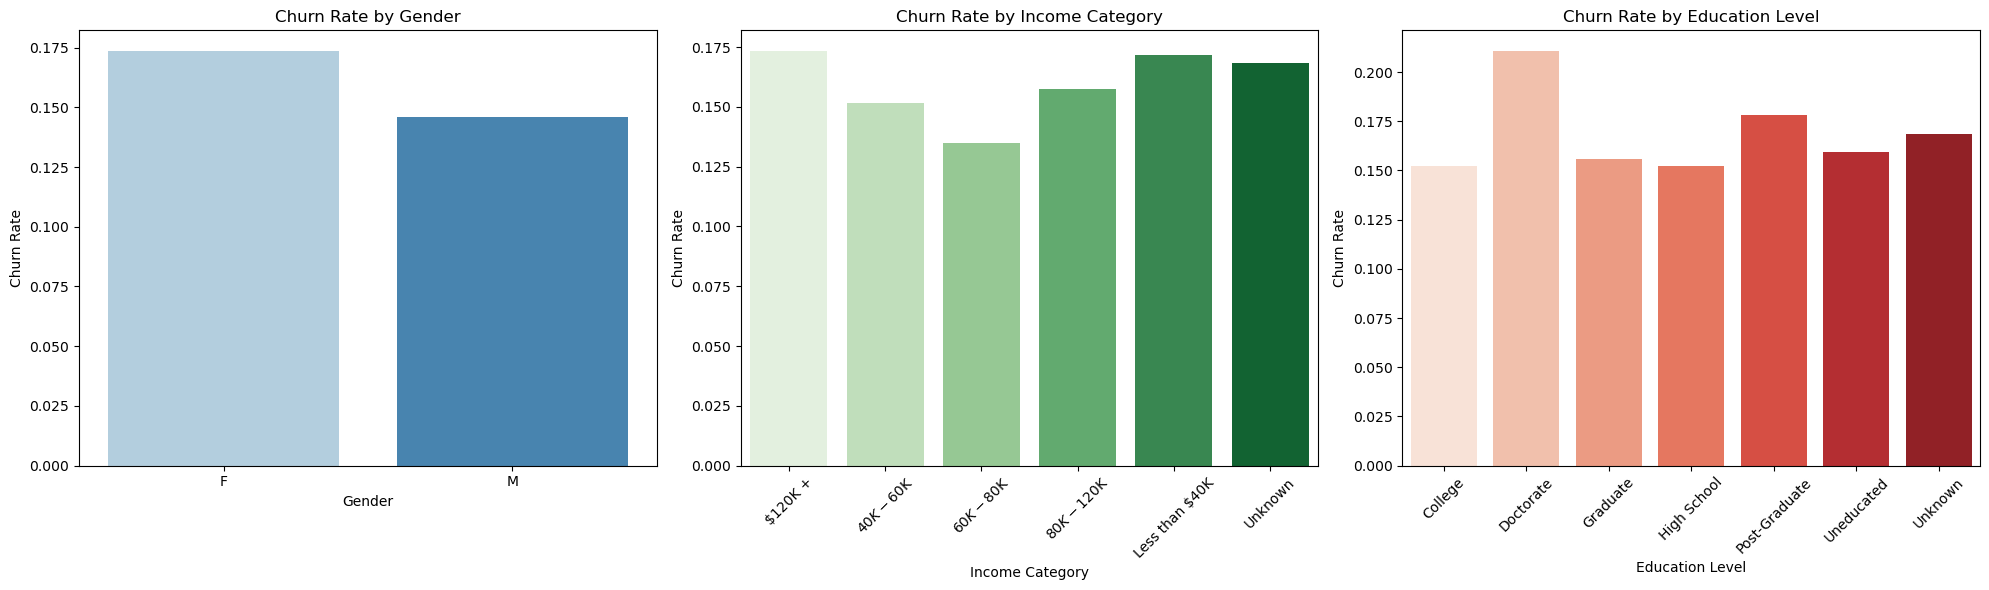

In [47]:
# Create a figure with subplots arranged horizontally
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 1. Visualize Churn Rate by Gender with a custom palette
churn_rate_gender = df_eda.groupby('Gender')['Attrition_Flag'].mean().reset_index()
sns.barplot(x='Gender', y='Attrition_Flag', data=churn_rate_gender, ax=axes[0], palette='Blues')
axes[0].set_title('Churn Rate by Gender')
axes[0].set_ylabel('Churn Rate')
axes[0].set_xlabel('Gender')

# 2. Visualize Churn Rate by Income Category with a different palette
churn_rate_income = df_eda.groupby('Income_Category')['Attrition_Flag'].mean().reset_index()
sns.barplot(x='Income_Category', y='Attrition_Flag', data=churn_rate_income, ax=axes[1], palette='Greens')
axes[1].set_title('Churn Rate by Income Category')
axes[1].set_ylabel('Churn Rate')
axes[1].set_xlabel('Income Category')
axes[1].tick_params(axis='x', rotation=45)

# 3. Visualize Churn Rate by Education Level with another palette
churn_rate_education = df_eda.groupby('Education_Level')['Attrition_Flag'].mean().reset_index()
sns.barplot(x='Education_Level', y='Attrition_Flag', data=churn_rate_education, ax=axes[2], palette='Reds')
axes[2].set_title('Churn Rate by Education Level')
axes[2].set_ylabel('Churn Rate')
axes[2].set_xlabel('Education Level')
axes[2].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

<a name="426-key-insights-from-categorical-variable-churn-rate-analysis"></a>
### 4.2.6 Key Insights from Categorical Variable Churn Rate Analysis

- **Gender**: Females have a slightly higher churn rate (17.36%) compared to males (14.62%), indicating the need for targeted retention strategies for female customers.

- **Income Category**: Customers earning 60K-80K have the lowest churn rate (13.48%), while both **high-income** and **low-income** groups have higher churn rates (around 17%).

- **Education Level**: **Doctorate holders** show the highest churn rate (21.06%), suggesting a potential need for customized services for highly educated customers.